# **Import the libraries**

In [24]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dark_Coder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load the dataset

In [2]:
# Read CSV through pandas 
df=pd.read_csv("spam_ham_dataset.csv")

In [3]:
# load first 5 dataset
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Check the shape of the dataset

In [4]:
print(f"The number of rows in a dataset {df.shape[0]}")
print(f"The number of columns in a dataset {df.shape[1]}")

The number of rows in a dataset 5171
The number of columns in a dataset 4


In [5]:
# lets see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


- This info tell that there are two numericals and two categoricals Dtype

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5171.0,2585.000000,1492.883452,0.0,1292.5,2585.0,3877.5,5170.0
label_num,5171.0,0.289886,0.453753,0.0,0.0,0.0,1.0,1.0


---
# **Check the Null values**

In [7]:
# Check the null values in a given dataset
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

- No null values in a dataset

In [8]:
# Check the duplicated values 
print(f"Duplicated values in a dataset: {df.duplicated().sum()}")

Duplicated values in a dataset: 0


## Lets check the label column 

In [9]:
df["label"].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

---
# **Data Visulization**

- In label column its clearly understand that ham(3672) counting is higher then spam(1499)

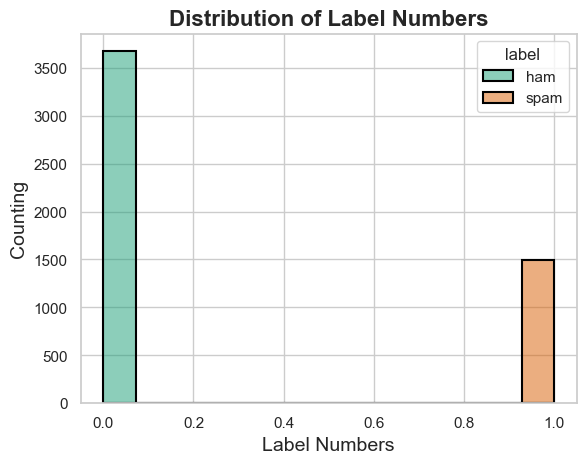

In [10]:
# Set the overall aesthetic of the plots
sns.set(style="whitegrid")  # Professional style with grid

# Use the 'Dark2' palette for professional color tones
sns.histplot(data=df, x="label_num", hue="label", palette="Dark2", linewidth=1.5)

plt.title("Distribution of Label Numbers", fontsize=16, fontweight='bold')
plt.xlabel("Label Numbers", fontsize=14)
plt.ylabel("Counting", fontsize=14)

plt.show()


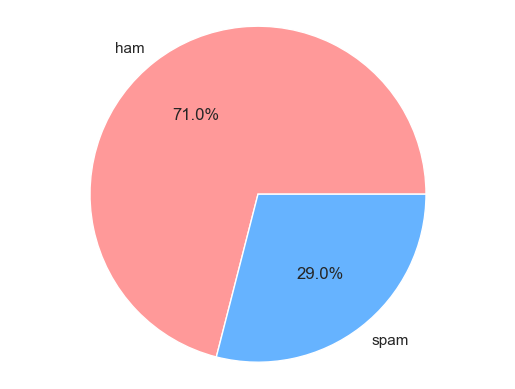

In [11]:
# lets check through pie chart
labels = df['label'].value_counts().index
sizes = df['label'].value_counts().values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # Define custom colors

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()


---
# **Data Preprocessing**

In [12]:
# Removing unnecessary  column
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [13]:
# Now lets check dataset again
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [14]:
# Create the function to preprocess the text

def clean_text(text):
    
    # Remove the punctuations
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize the words
    words = text.split()
    
    # Remove stopwords and apply stemming (the library we use)
    stop_words = stopwords.words('english')
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)


In [15]:
#Let check the dataset again 
df.head(10)["clean_text"]

0    subject enron methanol meter 988291 follow not...
1    subject hpl nom januari 9 2001 see attach file...
2    subject neon retreat ho ho ho around wonder ti...
3    subject photoshop window offic cheap main tren...
4    subject indian spring deal book teco pvr reven...
5    subject ehronlin web address chang messag inte...
6    subject spring save certif take 30 save 30 use...
7    subject look medic best sourc difficult make m...
8    subject nom actual flow 2 26 agre forward meli...
9    subject nomin oct 21 23 2000 see attach file h...
Name: clean_text, dtype: object

# **Machine learning**

In [20]:
tfidf_vectorizer = TfidfVectorizer()
X=tfidf_vectorizer.fit_transform(df["clean_text"]).toarray()
y=df["label_num"]

In [21]:
X_train, X_text, y_train, y_test=train_test_split(X, y ,test_size=0.2,random_state=42)

In [27]:
# Define models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


models = {
    "Naive Bayes": MultinomialNB(),
    "DTC": DecisionTreeClassifier(),
    "GNB": GaussianNB()
}

best_results = {}
best_model_name = None
best_accuracy = 0.0 

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Training  the model
    y_pred = model.predict(X_text)  # Predict on the test set

    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    best_results[name] = accuracy  # Store accuracy in the results dictionary

    # Display accuracy and classification report for the current model
    print(f"{name} Accuracy: {accuracy:.2f}")
    print("-----------------------------------------------------")
    print(classification_report(y_test, y_pred))

    # Check if this is the best accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

# Display the model with the best accuracy at the end
print("\nBest Model:")
print(f"{best_model_name} with Accuracy: {best_accuracy:.2f}")


Naive Bayes Accuracy: 0.92
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       742
           1       1.00      0.72      0.84       293

    accuracy                           0.92      1035
   macro avg       0.95      0.86      0.89      1035
weighted avg       0.93      0.92      0.92      1035

DTC Accuracy: 0.96
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       742
           1       0.93      0.93      0.93       293

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

GNB Accuracy: 0.94
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       742
          

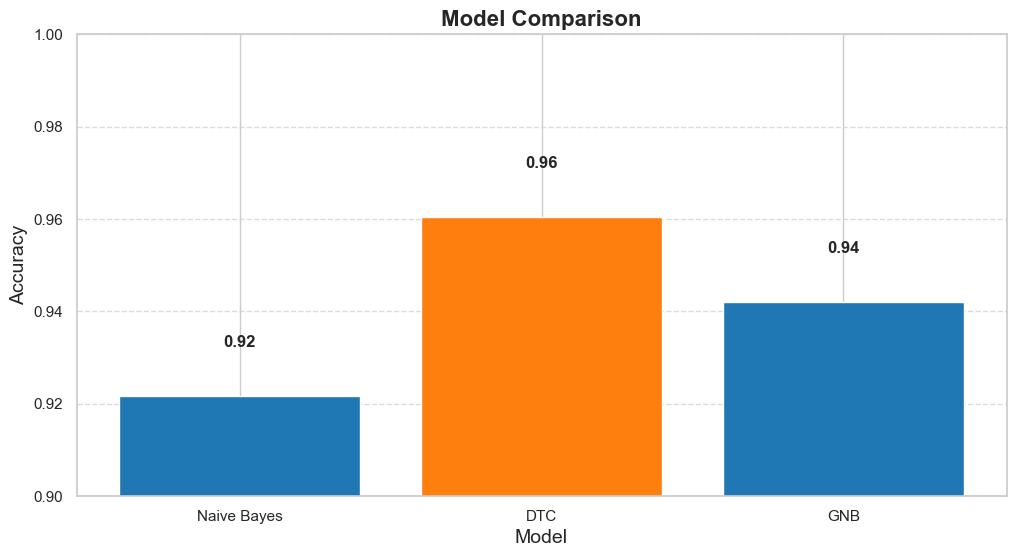

In [28]:
# Visualize the models Accuracy 

# Define a color palette
colors = ['#1f77b4', '#ff7f0e']  # Example colors: blue and orange

plt.figure(figsize=(12, 6))
bars = plt.bar(best_results.keys(), best_results.values(), color=colors)
plt.title('Model Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
